In [7]:
#################################
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input

# Define the path to your mounted drive containing "healthy" and "patient" folders
data_dir = 'D:/vs mini/dataset2'

# Define a directory to save the preprocessed images in Colab's file system
preprocessed_images_dir = 'D:/modelgraph/fullgraph'
os.makedirs(preprocessed_images_dir, exist_ok=True)

# Create an ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 256,  # Scale pixel values to be in the range [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate and save batches of preprocessed images
batch_size = 32
target_size = (256, 256)  # Resize images to 256x256 pixels

generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' for multi-class classification
    save_to_dir=preprocessed_images_dir,  # Specify the directory to save the preprocessed images
    save_format='jpeg'  # Format for saved images
)

# Generate and save the preprocessed images with labels
for _ in range(len(generator)):
    batch_images, batch_labels = next(generator)
    for i, label in enumerate(batch_labels):
        if label == 0:
            category_folder = 'healthy'
        else:
            category_folder = 'patient'
        image_filename = f'preprocessed_{i}.jpeg'
        image_path = os.path.join(preprocessed_images_dir, category_folder, image_filename)
        os.makedirs(os.path.join(preprocessed_images_dir, category_folder), exist_ok=True)
        tf.keras.preprocessing.image.save_img(image_path, batch_images[i])

Found 730 images belonging to 4 classes.


In [2]:
# Define paths to your image folders
healthy_dir = 'D:/vs mini/dataset2/healthy'
patient_dir = 'D:/vs mini/dataset2/patient'

In [39]:
# Cell 2: Initialize lists to store features and labels
all_features = []
labels = []

# Load pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a function to extract features using a given model and preprocess input
def extract_features(model, preprocess_input, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()  # Flatten the features

# Load, preprocess, and extract features from healthy images
for filename in os.listdir(healthy_dir):
    img_path = os.path.join(healthy_dir, filename)
    resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
    vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
    inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
    combined_features = np.concatenate((resnet_features, vgg_features, inception_features))
    all_features.append(combined_features)
    labels.append(0)  # Label 0 for healthy

# Load, preprocess, and extract features from patient images
for filename in os.listdir(patient_dir):
    img_path = os.path.join(patient_dir, filename)
    resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
    vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
    inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
    combined_features = np.concatenate((resnet_features, vgg_features, inception_features))
    all_features.append(combined_features)
    labels.append(1)  # Label 1 for patient

# Convert lists to numpy arrays
X = np.array(all_features)
y = np.array(labels)

1/1 [==============================] - 0s 67ms/step


In [44]:
# Define a directory to save the best feature vector
X_save_dir = 'D:/modelgraph/X730.npy'  # Change this to your desired directory
y_save_dir = 'D:/modelgraph/y730.npy'  # Change this to your desired directory
# Save the best feature vector as a NumPy array
np.save(X_save_dir, X)
np.save(y_save_dir,y)

print(f"X and Y feature vector saved to {X_save_dir} and {y_save_dir}")

X and Y feature vector saved to D:/modelgraph/X730.npy and D:/modelgraph/y730.npy


In [45]:
###################################
# Load the x and y feature vector
loaded_x = np.load('D:/modelgraph/X730.npy')
loaded_y = np.load('D:/modelgraph/y730.npy')
print("x and y vector loaded")

x and y vector loaded


In [46]:
##################################
X=loaded_x
y=loaded_y

In [ ]:
population_size = 20  # Adjust the population size to ensure it's at least as large as selection_size


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, log_loss, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:

# Genetic Algorithm Parameters
population_sizes = list(range(10, 51, 5))
total_iterations = 200
crossover_rate = 0.7
mutation_rate = 0.3
selection_size = 20
random_seed = 13

# Create an initial population of binary feature vectors
def initialize_population(population_size, feature_count):
    population = np.random.randint(2, size=(population_size, feature_count))
    return population

# Calculate fitness (accuracy) for each feature vector
def calculate_fitness(population, X, y):
    fitness_scores = []
    for i in range(population.shape[0]):
        selected_features = population[i, :]
        subset_X = X[:, selected_features == 1]
        X_train, X_test, y_train, y_test = train_test_split(subset_X, y, test_size=0.3, random_state=random_seed)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fitness_scores.append(accuracy)
    return np.array(fitness_scores)


In [ ]:

# Genetic Algorithm
def genetic_algorithm(X, y, population_size):
    feature_count = X.shape[1]
    population = initialize_population(population_size, feature_count)

    best_accuracy = 0
    best_vector = None
    accuracies = []
    losses = []

    for iteration in range(total_iterations):
        fitness_scores = calculate_fitness(population, X, y)

        top_indices = np.argsort(fitness_scores)[-min(selection_size, population_size):]
        top_population = population[top_indices, :]

        new_population = []
        while len(new_population) < population_size:
            parent1 = top_population[np.random.randint(len(top_population))]
            parent2 = top_population[np.random.randint(len(top_population))]
            crossover_mask = (np.random.rand(feature_count) < crossover_rate).astype(int)
            child = (parent1 * crossover_mask) + (parent2 * (1 - crossover_mask))

            mutation_mask = (np.random.rand(feature_count) < mutation_rate).astype(int)
            child = (child + mutation_mask) % 2

            new_population.append(child)

        population = np.array(new_population)

        # Calculate the accuracy and loss for the best candidate in this iteration
        final_fitness_scores = calculate_fitness(population, X, y)
        max_accuracy = np.max(final_fitness_scores)
        if max_accuracy > best_accuracy:
            best_accuracy = max_accuracy
            best_vector = population[np.argmax(final_fitness_scores)]

        accuracies.append(max_accuracy)

        # Calculate the loss for the best candidate in this iteration
        selected_features = best_vector
        subset_X = X[:, selected_features == 1]
        X_train, X_test, y_train, y_test = train_test_split(subset_X, y, test_size=0.3, random_state=random_seed)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probability of class 1
        loss = log_loss(y_test, y_pred_proba)
        losses.append(loss)

    return best_accuracy, best_vector, accuracies, losses

# Data loading (replace this with your data)
X, y = X,y

# Initialize lists to store results
peak_accuracies = []
best_feature_vectors = []
accuracy_vs_iteration = []
loss_vs_iteration = []
test_losses = []
recalls = []
auc_scores = []
precisions = []

# Perform the analysis for varying population sizes
for population_size in population_sizes:
    best_accuracy, best_vector, accuracies, losses = genetic_algorithm(X, y, population_size)
    peak_accuracies.append(best_accuracy)
    best_feature_vectors.append(best_vector)
    accuracy_vs_iteration.append(accuracies)
    loss_vs_iteration.append(losses)

    # Calculate test loss
    selected_features = best_vector
    subset_X = X[:, selected_features == 1]
    X_train, X_test, y_train, y_test = train_test_split(subset_X, y, test_size=0.3, random_state=random_seed)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probability of class 1
    test_loss = log_loss(y_test, y_pred_proba)
    test_losses.append(test_loss)

    # Calculate recall, AUC, and precision
    y_pred = knn.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)

    precision = precision_score(y_test, y_pred)
    precisions.append(precision)


In [ ]:
#SAVING FEATURE VECTOR
# After running your Genetic Algorithm

# Save the best feature vector obtained from the Genetic Algorithm
best_feature_vector = best_feature_vectors[-1]  # The last element contains the best feature vector

# Define a directory to save the best feature vector
best_feature_vector_save_dir = 'D:/modelgraph/best_feature_vector.npy'  # Change this to your desired directory

# Save the best feature vector as a NumPy array
np.save(best_feature_vector_save_dir, best_feature_vector)

print(f"Best feature vector saved to {best_feature_vector_save_dir}")


In [4]:
##############################
best_feature_vector_save_dir = 'D:/modelgraph/best_feature_vector.npy'

In [5]:
##############################
# Load the best feature vector
loaded_best_feature_vector = np.load(best_feature_vector_save_dir)

# Now, 'loaded_best_feature_vector' contains the best feature vector obtained from your GA.


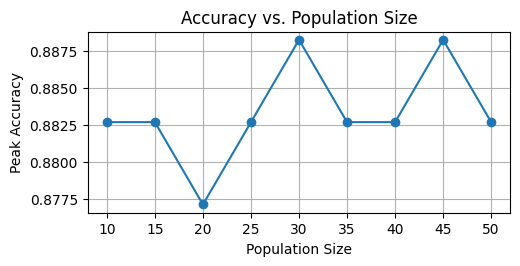

In [ ]:

#  Accuracy vs. Population
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(population_sizes, peak_accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. Population Size")
plt.xlabel("Population Size")
plt.ylabel("Peak Accuracy")
plt.grid(True)


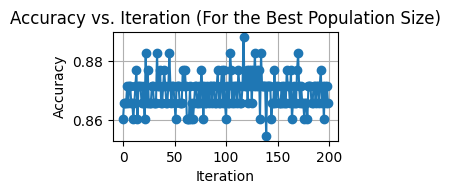

In [ ]:


# Accuracy vs. Iteration (For the best population size)
plt.subplot(3, 2, 3)
best_population_size = population_sizes[np.argmax(peak_accuracies)]
best_accuracy_vs_iteration = accuracy_vs_iteration[population_sizes.index(best_population_size)]
plt.plot(range(total_iterations), best_accuracy_vs_iteration, marker='o', linestyle='-')
plt.title("Accuracy vs. Iteration (For the Best Population Size)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)


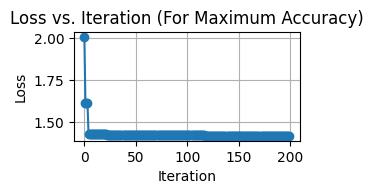

In [ ]:

#  Loss vs. Iteration (For the best population size)
plt.subplot(3, 2, 4)
best_loss_vs_iteration = loss_vs_iteration[population_sizes.index(best_population_size)]
plt.plot(range(total_iterations), best_loss_vs_iteration, marker='o', linestyle='-')
plt.title("Loss vs. Iteration (For Maximum Accuracy)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)


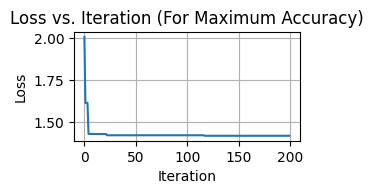

In [ ]:

#  For Maximum Accuracy - Loss vs. Iteration
plt.subplot(3, 2, 5)
plt.plot(range(total_iterations), loss_vs_iteration[population_sizes.index(best_population_size)])
plt.title("Loss vs. Iteration (For Maximum Accuracy)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)


In [7]:
#############################    
# Multiply the optimized binary feature vector with the input feature vector
optimized_feature_map = loaded_x[:, loaded_best_feature_vector == 1]

In [9]:
####################################
from sklearn.model_selection import train_test_split
random_seed=80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [19]:
# Ensure the binary vector has the correct length
if loaded_best_feature_vector.shape[0] != X_train.shape[1]:
    print("Adjusting the length of best_vector...")
    loaded_best_feature_vector = loaded_best_feature_vector[:X_train.shape[1]]  # Trim or expand best_vector as needed


In [12]:
###############################
# Check the shape of best_vector
print("Shape of best_vector:", loaded_best_feature_vector.shape)

# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

# Ensure the binary vector has the correct length
if loaded_best_feature_vector.shape[0] != X_train.shape[1]:
    print("Adjusting the length of best_vector...")
    loaded_best_feature_vector = loaded_best_feature_vector[:X_train.shape[1]]  # Trim or expand best_vector as needed

# Select relevant features
selected_train_features = X_train[:, loaded_best_feature_vector == 1]
selected_test_features = X_test[:, loaded_best_feature_vector == 1]

# Continue with your code, e.g., training a KNN classifier


Shape of best_vector: (176640,)
Shape of X_train: (475, 176640)


Accuracy using the optimized feature set: 94.12%


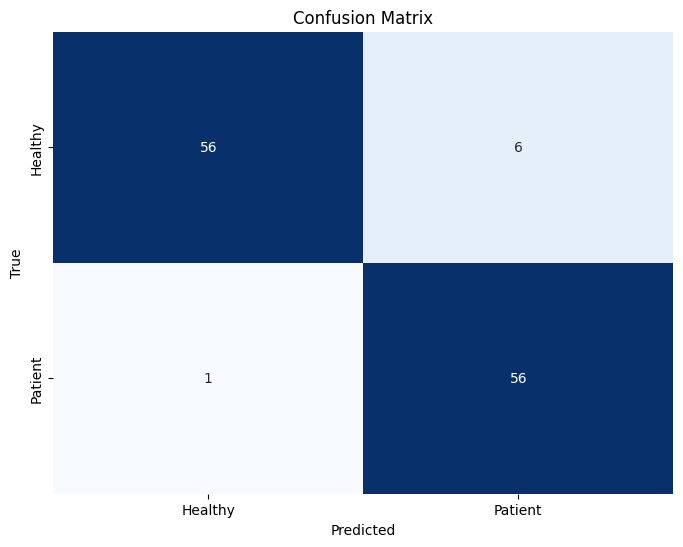

Total values successfully predicted: 112 (112)
Incorrect predictions: 7 (7)
Precision: 0.9032258064516129
Recall: 0.9824561403508771
F1-Score: 0.9411764705882352


In [13]:
###################################
# Cell 4: Assuming you have the best binary vector as 'best_vector' from the GA


# Train a KNN classifier on the selected training features
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(selected_train_features, y_train)

# Evaluate the KNN classifier on the selected testing features
accuracy = knn.score(selected_test_features, y_test)

print(f"Accuracy using the optimized feature set: {accuracy*100:.2f}%")

# Calculate the confusion matrix
y_pred = knn.predict(selected_test_features)
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Healthy", "Patient"], yticklabels=["Healthy", "Patient"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate the number of correct and incorrect predictions
correct_predictions = np.diag(confusion).sum()
incorrect_predictions = confusion.sum() - correct_predictions

# Print the results
print(f"Total values successfully predicted: {correct_predictions} ({confusion[0, 0] + confusion[1, 1]})")
print(f"Incorrect predictions: {incorrect_predictions} ({confusion[0, 1] + confusion[1, 0]})")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

In [9]:
# Define paths to your image folders
healthy_dir = 'D:/vs mini/dataset2/healthy'
patient_dir = 'D:/vs mini/dataset2/patient'

In [10]:
img_path = 'D:/vs mini/dataset2/healthy/circA-P4.jpg'

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Assuming you have loaded the images and defined healthy_dir and patient_dir
# Also, you have loaded the trained models (resnet_preprocess_input, vgg_preprocess_input, inception_preprocess_input)

# Cell 1: Feature Extraction

# Initialize lists to store features and labels
all_features = []
labels = []

# Load pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a function to extract features using a given model and preprocess input
def extract_features(model, preprocess_input, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()  # Flatten the features

# Load, preprocess, and extract features from healthy images
for filename in os.listdir(healthy_dir):
    img_path = os.path.join(healthy_dir, filename)
    resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
    vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
    inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
    combined_features = np.concatenate((resnet_features, vgg_features, inception_features))
    all_features.append(combined_features)
    labels.append(0)  # Label 0 for healthy

# Load, preprocess, and extract features from patient images
for filename in os.listdir(patient_dir):
    img_path = os.path.join(patient_dir, filename)
    resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
    vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
    inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
    combined_features = np.concatenate((resnet_features, vgg_features, inception_features))
    all_features.append(combined_features)
    labels.append(1)  # Label 1 for patient

# Convert lists to numpy arrays
X = np.array(all_features)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 2: Neural Network Integration

# Assuming combined_features is the feature vector obtained from VGG19, ResNet-50, and Inception V3
feature_vector_length = combined_features.shape[0]

# Initialize a Sequential Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(feature_vector_length,)),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Neural Network model's performance
_, accuracy_nn = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Model Accuracy: {accuracy_nn:.2f}")



1/1 [==============================] - 0s 65ms/step
Epoch 1/10
16/16 [==============================] - 3s 163ms/step - loss: 8.6075 - accuracy: 0.7361 - val_loss: 3.8777 - val_accuracy: 0.7698
Epoch 2/10
16/16 [==============================] - 2s 135ms/step - loss: 1.6671 - accuracy: 0.8929 - val_loss: 1.1259 - val_accuracy: 0.8968
Epoch 3/10
16/16 [==============================] - 2s 145ms/step - loss: 0.2954 - accuracy: 0.9444 - val_loss: 1.5694 - val_accuracy: 0.8492
Epoch 4/10
16/16 [==============================] - 2s 135ms/step - loss: 0.0521 - accuracy: 0.9802 - val_loss: 1.1256 - val_accuracy: 0.8968
Epoch 5/10
16/16 [==============================] - 2s 131ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.9560 - val_accuracy: 0.9365
Epoch 6/10
16/16 [==============================] - 2s 128ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.0517 - val_accuracy: 0.9127
Epoch 7/10
16/16 [==============================] - 2s 128ms/step - loss: 0.0010 - accuracy: 1.0

In [8]:
# Assuming you have already trained and compiled the `nn_model`

# Specify the path where you want to save the model
model_save_path = 'D:/modelgraph/nnmodel'

# Save the model
nn_model.save(model_save_path)

# Print a message to confirm that the model has been saved
print(f"Model saved to {model_save_path}")


INFO:tensorflow:Assets written to: D:/modelgraph/nnmodel\assets


INFO:tensorflow:Assets written to: D:/modelgraph/nnmodel\assets


Model saved to D:/modelgraph/nnmodel


In [20]:
# Cell 3: Runtime Prediction

# Assuming you have a new image for classification
img_path = 'D:/vs mini/dataset2/patient/circA-P31.jpg'  # Replace with the path to your new image

# Assuming you have loaded the runtime input image into img_path
runtime_resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
runtime_vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
runtime_inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
runtime_combined_features = np.concatenate((runtime_resnet_features, runtime_vgg_features, runtime_inception_features))

# Now, you can use the trained Neural Network model for runtime predictions
runtime_input_features = runtime_combined_features.reshape(1, -1)
runtime_prediction_nn = nn_model.predict(runtime_input_features)

# Convert the prediction to a meaningful label using a threshold (commonly 0.5)
result_nn = "Healthy" if runtime_prediction_nn < 0.5 else "Affected"  # Assuming binary classification

print(f"The input is classified as {result_nn} by Neural Network")

1/1 [==============================] - 0s 34ms/step
The input is classified as Affected by Neural Network


In [1]:
######DONT RUN
# Load the saved model
import tensorflow as tf
model_load_path = 'D:/modelgraph/nnmodel'  # Replace with the actual path where your model is saved
loaded_model = tf.keras.models.load_model(model_load_path)

# Assuming you have a new image for classification
img_path = 'D:/vs mini/dataset2/patient/circA-P16.jpg'  # Replace with the path to your new image

# Assuming you have preprocessed and extracted features from the new image as in your previous code
# runtime_resnet_features, runtime_vgg_features, runtime_inception_features, runtime_combined_features

# Now, you can use the loaded model to make predictions on the new image's features
runtime_input_features = runtime_combined_features.reshape(1, -1)
runtime_prediction_nn = loaded_model.predict(runtime_input_features)

# Convert the prediction to a meaningful label using a threshold (commonly 0.5)
result_nn = "Healthy" if runtime_prediction_nn < 0.5 else "Affected"  # Assuming binary classification

print(f"The new input image is classified as {result_nn} by the loaded model")


NameError: name 'runtime_combined_features' is not defined

NameError: name 'extract_features' is not defined